# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

In [1]:
# importing stuff
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.

In [2]:
# loading the data set
df = pd.read_csv("./hw data/ForeignGifts_edu.csv")
df

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
...,...,...,...,...,...,...,...,...,...,...
28216,28217,4279700,Albert Einstein College of Medicine,Bronx,NY,42704,381717,Contract,CHINA,Chia Tai TianQing Pharmaceutical Gr
28217,28218,4279700,Albert Einstein College of Medicine,Bronx,NY,42778,444938,Contract,ISRAEL,BL Oncology Ltd
28218,28219,4279700,Albert Einstein College of Medicine,Bronx,NY,42907,1064580,Contract,ENGLAND,Roche Products Limited
28219,28220,4279700,Albert Einstein College of Medicine,Bronx,NY,42948,737375,Contract,SWITZERLAND,F Hoffman-La Roche Ltd


2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.

Looking at the histogram, we can see that the majority of the Foreign Gift Amounts are under $4 million. There are a few gift amounts that are above that, and they create a very small tail in the histogram. Looking at the statistical description, we can see that the average gift amount if about half a million dollars. However, this does not look consistent with what we are seeing on the histogram.

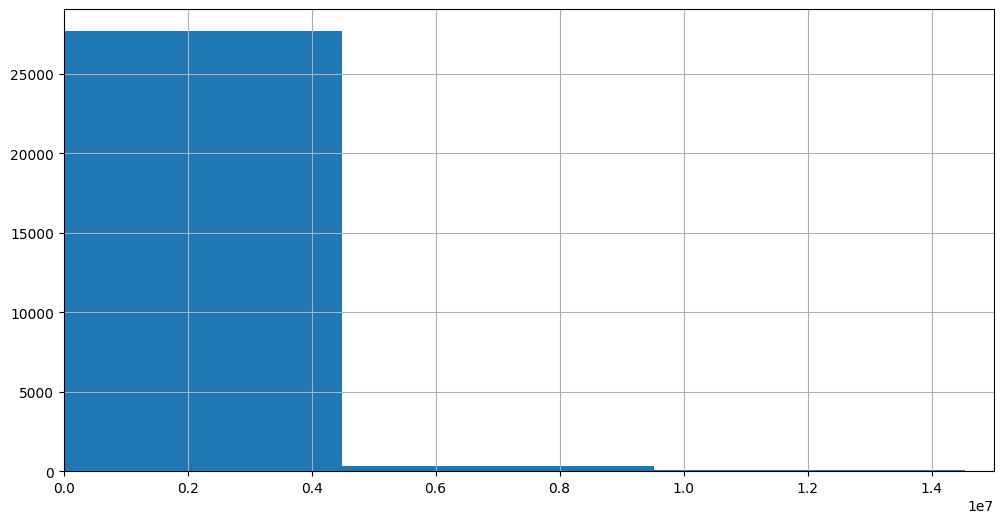

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64

In [3]:
# histogram for Foreign Gift Amount
# make sure all values are numeric 
df['Foreign Gift Amount'] = pd.to_numeric(df['Foreign Gift Amount'], errors='coerce')

# plot
plt.figure(figsize=(12,6))
df['Foreign Gift Amount'].hist(bins=20)
plt.xlim(0,15000000)
plt.show()

# print out the statistical description
df['Foreign Gift Amount'].describe()

3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?

The proportion of gifts that are contrats is 0.612. The proportion of gifts that are real estate are 0.000389. The proprtion of gifts that are monetary gifts are 0.388.

In [4]:
# create value counts table for Gift Type
print(df['Gift Type'].value_counts(dropna=False))

# calculate the proportions
contract = 17274
mgift = 10936
restate = 11
total = contract + mgift + restate

cprop = contract / total
mprop = mgift / total
rprop = restate / total
print("Contract proportion: " , cprop)
print("Monetary Gift proportion: " , mprop)
print("Real estate proportion: " , rprop)

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64
Contract proportion:  0.6120973742957372
Monetary Gift proportion:  0.3875128450444704
Real estate proportion:  0.00038978065979235324


4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?

Looking at the KDE plot for the log of Foreign Gift Amount, conditional on gift type, the peak of the plots is all around the same x value even though the behavior before this peak is a little different for each Gift Type. These individual peaks are also around the same x value as the peak in the first KDE plot of the log of Foreign Gift Amount. 

c:\Users\ilian\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


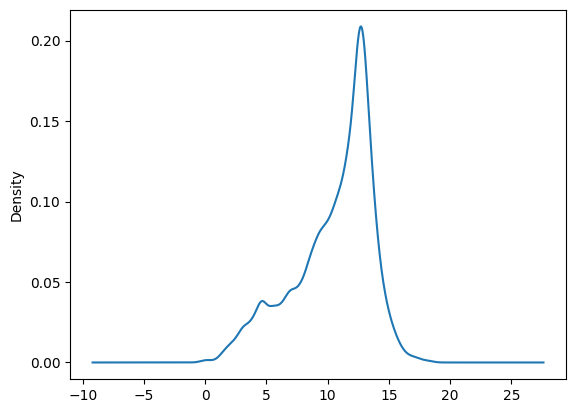

In [5]:
# kernel density plot of FGA_log

# create new column for log of Foreign Gift Amount
df['FGA_log'] = np.log(df['Foreign Gift Amount'])

# plot 
df['FGA_log'].plot.density()
plt.show()

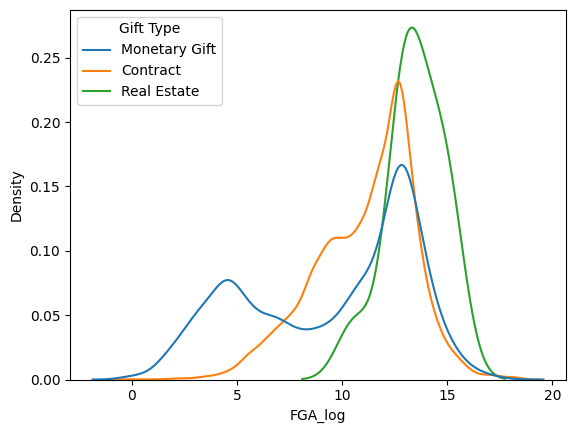

In [6]:
# kernel density plot of FGA_log, conditional on gift type
sns.kdeplot(data=df, x='FGA_log', hue='Gift Type', common_norm=False)
plt.show()

5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?

The top 15 countries in terms of the number of gifts are England, China, Canada, Japan, Switzerland, Saudi Arabia, France, Germany, Hong Kong, South Korea, Qatar, the Netherlands, Korea, India, and Taiwan.
The top 15 countries in terms of the amount given are Qatar, England, China, Saudi Arabia, Bermuda, Canada, Hong Kong, Japan, Switzerland, India, Germany, United Arab Emirates, France, Singapore, and Australia. 

In [9]:
# top 15 countries for number of gifts
# .groupby([vars]).count() and .groupby([vars]).sum()
df.head(10)

# grouping by country and counts of Foreign Gift Amount
gift_counts = df.groupby('Country of Giftor').count()['Foreign Gift Amount']
# sorting counts in descending order to get top 15 
top = gift_counts.sort_values(ascending=False).head(15)
print(top)

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: Foreign Gift Amount, dtype: int64


In [8]:
# top 15 countries for amount given
gift_amount = df.groupby('Country of Giftor').sum()['Foreign Gift Amount']
tops = gift_amount.sort_values(ascending=False).head(15)
print(tops)

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 

The top 15 institutions in terms of the total amount of money they receive are Carnegie Mellon University, Cornell University, Harvard University, Massachusetts Institute of Technology, Yale University, Texas A&M University, John Hopkins University, Northwestern University, Georgetown University, University of Chicago, University of Colorado Boulder, Duke University, Brigham Young University, Stanford University, and University of Texas MD Anderson Cancer Center. 

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


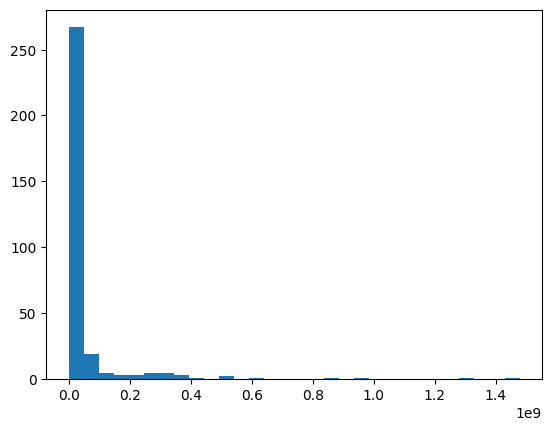

In [10]:
# top 15 institutions of total amount of money they receive
receivers = df.groupby('Institution Name').sum()['Foreign Gift Amount']
inst = receivers.sort_values(ascending=False).head(15)
print(inst)

# histogram of total amount received by all institutions
receivers.hist(bins=30, grid=False)
plt.show()

7. Which giftors provide the most money, in total?

The Qatar Foundation provides the most money, in total.

In [11]:
# grouping and sorting giftors by most money
giftors = df.groupby('Giftor Name').sum()['Foreign Gift Amount']
g = giftors.sort_values(ascending=False).head(5)
print(g)

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
Name: Foreign Gift Amount, dtype: int64


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  

In [12]:
# loading data set 
af = pd.read_csv("./hw data/airbnb_hw.csv")

 2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.

The dimensions of the data is (30478 x 13). There are 30,478 observations. The variables included are: Host ID, Host Since, Name, Neighborhood, Property Type, Review Scores Rating, Room Type, Zipcode, Beds, Number of Records, Number of Reviews, Price, and Review Scores Rating.

In [13]:
# use .shape to print dimensions of the data 
print("Dimensions: " , af.shape)

# Observations are num of rows
print("\nObservations: " , af.shape[0])

# variables included are column names
print("\nVariables: " , af.columns)

af.head(10)

Dimensions:  (30478, 13)

Observations:  30478

Variables:  Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
5,1039,7/25/2008,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149,100.0
6,1783,8/12/2008,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250,100.0
7,2078,8/15/2008,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90,94.0
8,2339,8/20/2008,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,90.0,Entire home/apt,10009.0,2.0,1,95,270,90.0
9,2339,8/20/2008,Lovely 2 Bedroom East Village Nest,Manhattan,Apartment,95.0,Entire home/apt,10009.0,2.0,1,23,290,96.0


 3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?

There are more apartments available than any other `Property Type`. Lighthouses, Chalets, and Castles are the least available. Private rooms are more common than renting the entire property for Bed & Breakfasts, Cabins, Castles, Chalets, Dorms, Houses, Huts, Tents, and whatever falls into the Other category.

In [14]:
# create cross table with `Room Type` and `Property Type`
c = pd.crosstab(af['Room Type'], af['Property Type'], dropna=False)
c

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa,NaN
Room Type,,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4,2
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4,1
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0,0


  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.

Yes, the data are badly scaled. There are quite a few outliers. In the histogram there are many peaks and then a long, small tail. In the kernel density plot there is also a big peak in the middle. In the boxplot most of the values are in the low hundreds or below that, but then there are a few outliers in the low thousand. The statistical description shows a standard deviation around 108.

Transforming price into price_log makes the data much more evenly scaled and removes almost all the outliers. This histogram is almost bell-shaped. This kernel density plot has a different shape, with smaller peaks that aren't as drastic changes. This boxplot is more evenly distributed, with almost no outliers present. The statistical description shows a standard deviation around 0.6.

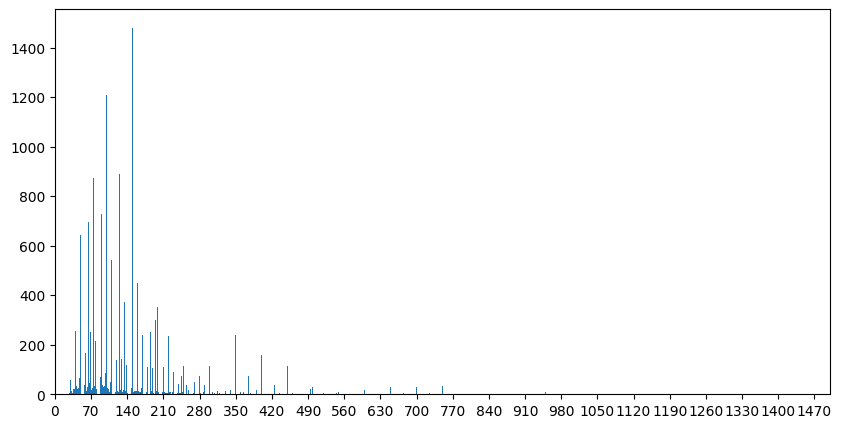

In [15]:
# making sure that the Price column is all numeric
af['Price1'] = pd.to_numeric(af['Price'], errors='coerce')

# Histogram for `Price` 
plt.figure(figsize=(10,5))

# create frequency variable for Price
price_freq = af['Price1'].value_counts()
plt.bar(x=price_freq.index, height=price_freq.values)

# change x axis labels to only every 70 units so can read more easily
plt.xlim(0,1500)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(70))

plt.show()

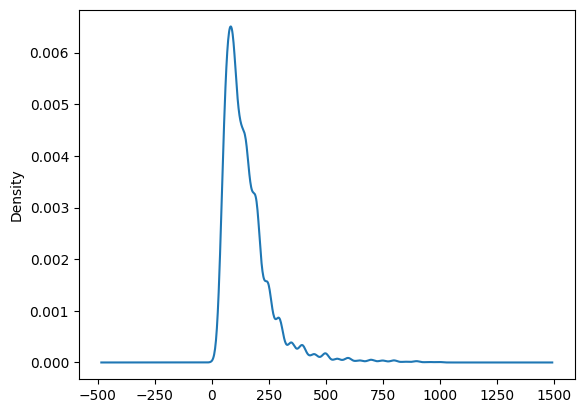

In [16]:
# kernel density plot 
af['Price1'].plot.density()
plt.show()

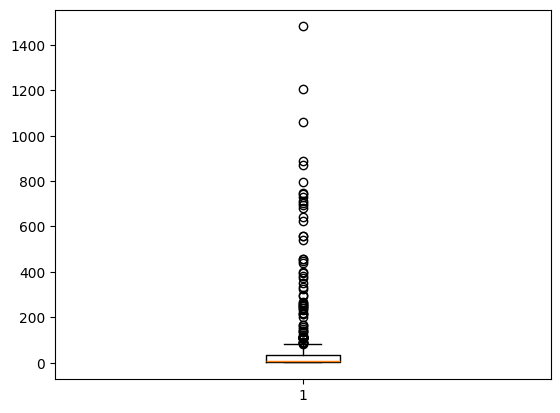

In [17]:
# Box plot 
plt.boxplot(price_freq)
plt.show()

In [18]:
# statistical description 
af['Price1'].describe()

count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price1, dtype: float64

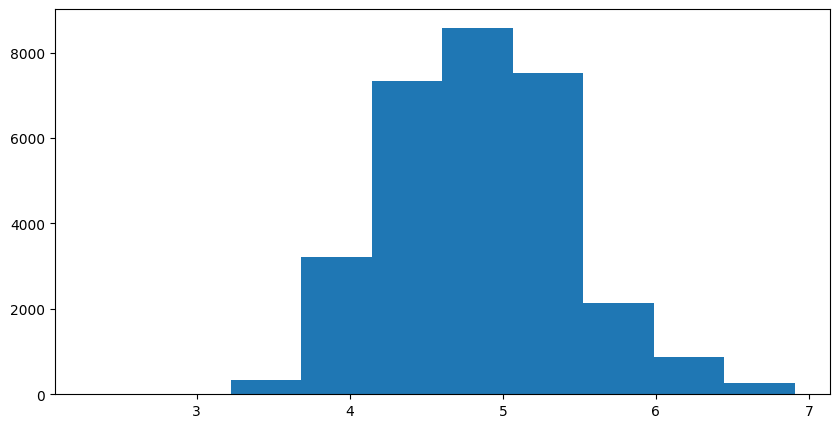

In [19]:
# using log to create a new column, price_log
af['price_log'] = np.log(af['Price1'])

# histogram of price_log
plt.figure(figsize=(10,5))
plt.hist(af['price_log'])

plt.show()

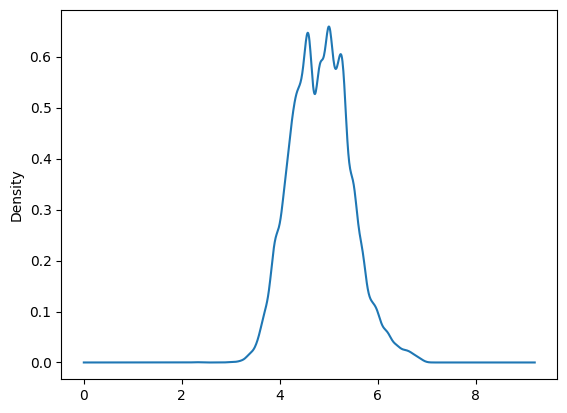

In [20]:
# price_log kernel density plot 
af['price_log'].plot.density()
plt.show()

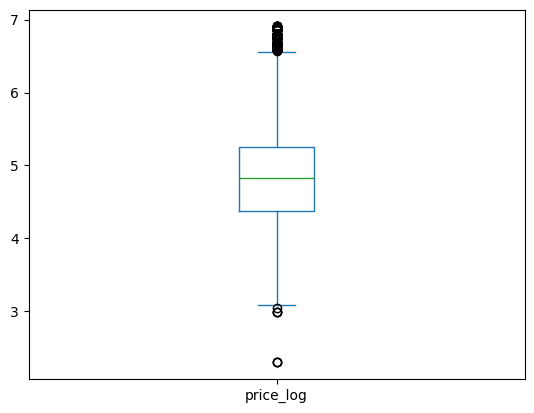

In [21]:
# price_log box plot 
af['price_log'].plot.box()
plt.show()

In [22]:
# price_log statistical description
af['price_log'].describe()

count    30297.000000
mean         4.845370
std          0.596999
min          2.302585
25%          4.382027
50%          4.828314
75%          5.257495
max          6.906755
Name: price_log, dtype: float64

  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a description of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

On the scatterplot, there are many horizontal lines. I believe that this is because none of the airbnbs are going to have a non-integer number of beds, such as 2.5 beds. Because of this, all of the points are going to be appear in horizontal lines because there are multiple options for some number of beds, and their price might just vary. Additionally, there is a higher concentration of points in the lower number of beds than in the higher number of beds. 

Looking at the statistical description of Price grouped by number of beds, we can see that as the number of beds increases, so does the average price, with the exception of 9 beds. The average price of 9 beds is the highest out of all the beds. Looking at the standard deviation of the prices, it seems to slowly increase as the number of beds increases, up until 7 beds, where it then starts decreasing. Above 10 beds, there is a high standard deviation except for 12 beds, which has the lowest standard deviation out of all the number of bed categories. 

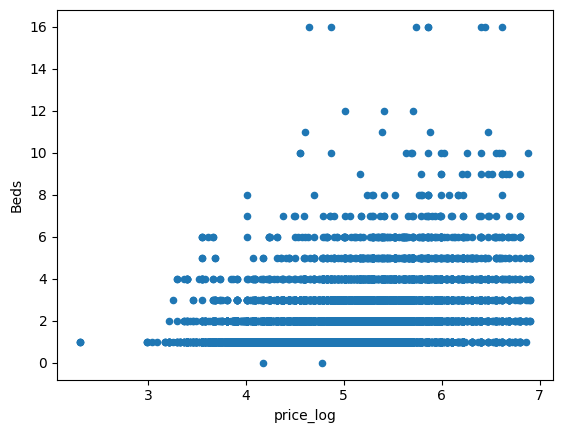

In [23]:
# scatter plot w price_log on x-axis and Beds on y-axis
af.plot.scatter(x='price_log',y='Beds')
plt.show()

In [24]:
# description of Price grouped by number of beds
af.loc[:,['price_log', 'Beds']].groupby('Beds').describe()

price_log                                                              \
         count      mean       std       min       25%       50%       75%   
Beds                                                                         
0.0        2.0  4.476755  0.427613  4.174387  4.325571  4.476755  4.627939   
1.0    20307.0  4.682084  0.527569  2.302585  4.317488  4.605170  5.043425   
2.0     6561.0  5.077679  0.546961  3.218876  4.744932  5.075174  5.416100   
3.0     2029.0  5.297638  0.572851  3.258097  4.941642  5.298317  5.700444   
4.0      766.0  5.438240  0.666451  3.295837  5.010635  5.480639  5.896449   
5.0      274.0  5.596976  0.624868  3.555348  5.225704  5.652489  6.052089   
6.0      166.0  5.538625  0.712393  3.555348  5.212968  5.602112  5.988961   
7.0       45.0  5.617009  0.693481  4.007333  5.176150  5.703782  6.098074   
8.0       20.0  5.674340  0.579810  4.007333  5.386655  5.826995  6.012435   
9.0       14.0  6.297723  0.444839  5.164786  6.044738  6.436951  6.620073   
10.0      15.0  5.878112  0.737968  4.553877  5.659094  5.991465  6.474005   
11.0       4.0  5.589773  0.791877  4.605170  5.196513  5.638475  6.031735   
12.0       3.0  5.376839  0.348237  5.010635  5.213368  5.416100  5.559941   
16.0       8.0  5.801986  0.722260  4.644391  5.516890  5.857933  6.407135   

                
           max  
Beds            
0.0   4.779123  
1.0   6.856462  
2.0   6.906755  
3.0   6.906755  
4.0   6.906755  
5.0   6.902743  
6.0   6.802395  
7.0   6.802395  
8.0   6.620073  
9.0   6.802395  
10.0  6.882437  
11.0  6.476972  
12.0  5.703782  
16.0  6.620073

 6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

On the scatterplot of price_log and beds, colored and styled by Room Type and Property Type, we can see that apartments and houses make up the majority of the points because there are a lot of pink/red/orange points. Solely looking at color still, we can see that the properties with many beds, upwards of 10, are all apartments or houses. Looking at Room Type, which is denoted by the 3 different styles of points (circle, cross, or square), we can see that the majority of the room types are either the entire home/apt or private room. Additionally, looking back to the points for the high number of beds, those are all circles, which signifies that the entire home/apt is available, which would explain the high number of beds. 

For Room Type, the entire home/apt has the highest prices on average. For Property Type, condos have the highest prices on average. For Room Type, the entire home/apt also has the highest standard deviation. For Property Type, the Other category has the highest standard deviation, however this is also closely followed by condos. For both columns, the median is always a little bit, or dramatically lower than the mean. Since there seems to be quite a few outliers in this dataset, it seems that the median might be a more reliable estiamte of central tendency, because it is not as effected by outliers and skewed data as the mean is. Of course, skewed data will still have an impact on the median, but it doesn't seem to have as big of an impact, and can be a more reliable estimate.

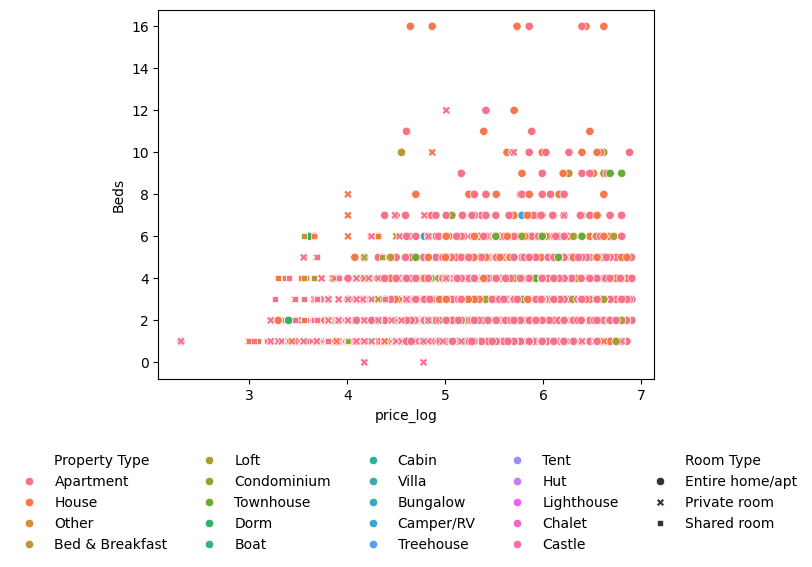

In [25]:
# scatterplot of price_log and beds, colored by Room Type and Property Type
sns.scatterplot(data=af, x='price_log', y='Beds', hue='Property Type', style='Room Type')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), frameon=False, ncol=5)

plt.show()

In [26]:
print("Price grouped by Room Tyoe: " , af.loc[:,['Price1', 'Room Type']].groupby('Room Type').describe())

print("\nPrice grouped by Property Type:" , af.loc[:,['Price1', 'Property Type']].groupby('Property Type').describe())

Price grouped by Room Tyoe:                    Price1                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  16855.0  204.061525  116.531136  10.0  135.0  175.0  239.0   
Private room     12599.0   90.663227   47.914195  10.0   65.0   80.0  100.0   
Shared room        843.0   76.553974   65.756210  10.0   45.0   60.0   85.0   

                        
                   max  
Room Type               
Entire home/apt  999.0  
Private room     999.0  
Shared room      950.0  

Price grouped by Property Type:                   Price1                                                \
                   count        mean         std    min     25%    50%   
Property Type                                                            
Apartment        26975.0  153.863170  104.112805   10.0   85.00  129.0   
Bed & Breakfast  

  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

Looking at the lower center of the plot, we can see that the data is actually distributed mostly for the number of beds being between 1 and 5. Also, looking at the bar chart on the top of the plot, we can see that the majority of the data is in the center of the price_log scale. It affects the way I think about the plots in 5 and 6 because the upper half of the data seems to not matter in this context. It is not shown on this jointplot at all. This leads me to believe that the most important, relevant, and concentrated data is for the options with the number of beds between 1 and 5. 

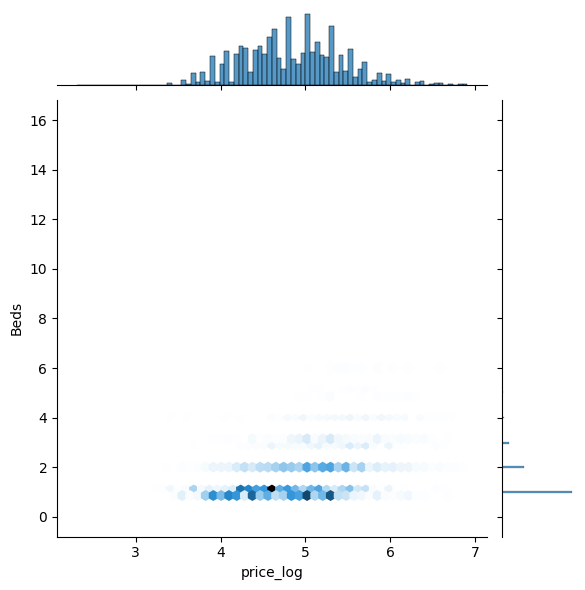

In [27]:
# making jointplot w price_log on x-axis and Beds on y-axis
sns.jointplot(data=af, x='price_log', y='Beds', kind='hex')
plt.show()